# Constraint Optimization

The notebook exercises numerical optimization of problems with equality constraints using Lagrangian multipliers and gradient descent. It implements [this](https://en.wikipedia.org/wiki/Lagrange_multiplier#Example_4:_Numerical_optimization) idea.

Function and constraint:

$$
\begin{align}
f(x)&=x^2\\
x^*&=\text{argmin}( f(x))\\
\text{subject to }& x^2=1
\end{align}
$$

The obviouse solutions are $x^*_0=1$ and $x^*_1=-1$.

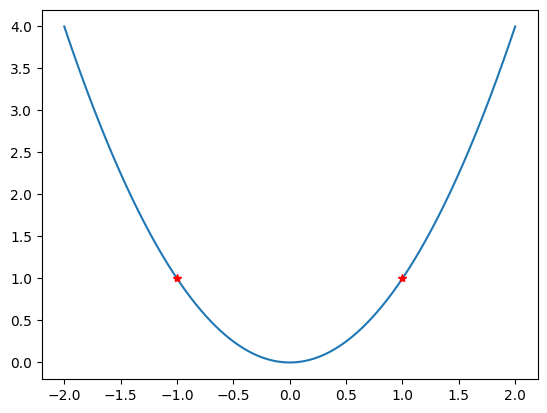

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(-2,2,1000)
Y = X**2

plt.plot(X,Y)
plt.plot(-1,1, c='r', marker='*')
plt.plot(1,1, c='r', marker='*')
plt.show()

Lagrange multipliers:

$$\mathcal L(x,\lambda) = x^2 + \lambda(x^2-1)$$

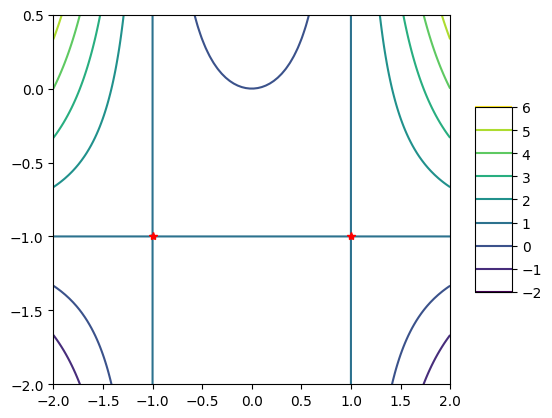

In [2]:
L = lambda x, l: x**2 + l*(x**2-1)
xs = np.linspace(-2,2,100)
ls = np.linspace(-2,0.5,100)

A, B = np.meshgrid(xs, ls)

fig = plt.figure()
ax = fig.add_subplot()
surf = ax.contour(A, B, L(A,B), cmap='viridis')
ax.plot(-1,-1, c='r', marker='*')
ax.plot(1,-1, c='r', marker='*')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

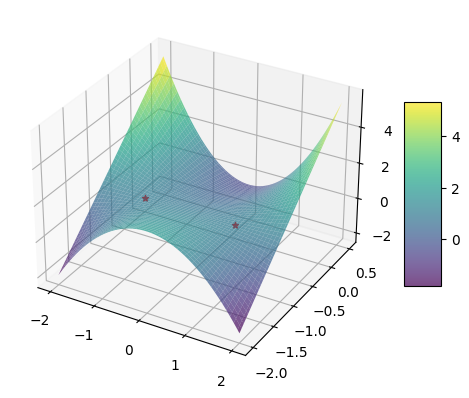

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(A, B, L(A,B), cmap='viridis', alpha=0.7)
ax.scatter(-1,-1, L(-1,-1), c='r', marker='*')
ax.scatter(1,-1, L(1,-1), c='r', marker='*')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

Partials:

$$
\begin{align}
\frac{\partial \mathcal L}{\partial x}&=2x+2x\lambda\\
\frac{\partial \mathcal L}{\partial \lambda}&=x^2-1
\end{align}
$$

In [4]:
def grad_L(x,l):
    grad_x = 2*x+2*x*l
    grad_l = x**2-1
    return np.array([grad_x, grad_l])

In [5]:
grad_L(0.5,0.5)

array([ 1.5 , -0.75])

In [6]:
def plot3d(f,A,B,real3d):
    Z = f(A,B)
    if real3d:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        surf = ax.plot_surface(A, B, Z, cmap='viridis')
        fig.colorbar(surf, shrink=0.5, aspect=5)
    else:
        fig = plt.figure()
        ax = fig.add_subplot(111)
        surf = ax.contour(A, B, Z, cmap='viridis')
        fig.colorbar(surf, shrink=0.5, aspect=5)
    return fig, ax
    

In [7]:
def grad_desc(K, x0, l0, learning_eps, f, ff, verbose):
    xs = np.zeros((K+1))
    ls = np.zeros((K+1))
    xs[0] = x0
    ls[0] = l0
    for k in range(K):
        grad = ff(xs[k], ls[k])
        grad_x = grad[0]
        grad_l = grad[1]
        xs[k+1] = xs[k] - learning_eps * grad_x 
        ls[k+1] = ls[k] - learning_eps * grad_l

    if verbose:
        xlow = min(-2, np.min(xs))
        xhigh = max(+2, np.max(xs))
        llow = min(-2, np.min(ls))
        lhigh = max(+0.5, np.max(ls))
        x_sequence = np.linspace(xlow, xhigh, 300)
        l_sequence = np.linspace(llow, lhigh, 300)

        A, B = np.meshgrid(x_sequence, l_sequence)
        fig, ax = plot3d(L, A, B, False)
        for k in range(K):
            ax.plot([xs[k], xs[k+1]], [ls[k], ls[k+1]])
    return xs, ls


4.596488233240132e-53, 9.946226665273938


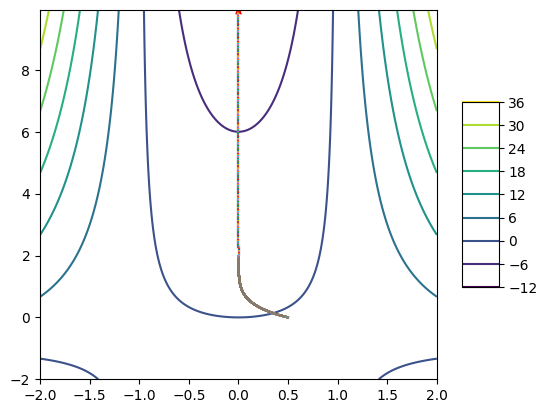

In [8]:
ff = lambda x,l: grad_L(x,l)

K = 10000
learning_eps = 0.001
xs, ls = grad_desc(K, 0.5,0, learning_eps, L, ff, True)
print(f'{xs[-1]}, {ls[-1]}')
plt.scatter(xs[-1], ls[-1], marker='*', c='r')
plt.show()

Gradient descent does not seam to converge to a solution.

The reason is that the critical points of Lagrangians occur at saddle points, rather than at local minima. Therefore, we must modify the problem formulation to ensure that it's a minimization problem. Below we do this by minimizing the square of the Lagrangian gradient's magnitude. 

(Squared) magnitude of the gradient of the Lagrangian:

$$h^2(x, \lambda) = (2x+2x\lambda)^2+(x^2-1)^2$$
$$h(x, \lambda) = \sqrt{(2x+2x\lambda)^2+(x^2-1)^2}$$

In [9]:

h2 = lambda x, l: (2*x+2*x*l)**2 + (x**2-1)**2
h = lambda x, l: np.sqrt(h2(x,l))

x_sequence = np.linspace(-3, 3, 300)
l_sequence = np.linspace(-3, 2, 300)

A,B = np.meshgrid(x_sequence, l_sequence)

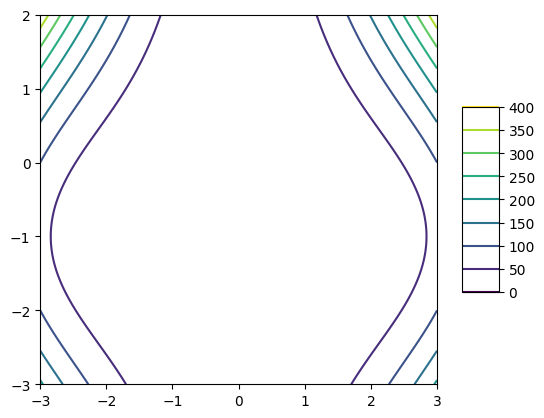

In [10]:
plot3d(h2, A, B, False)
plt.show()

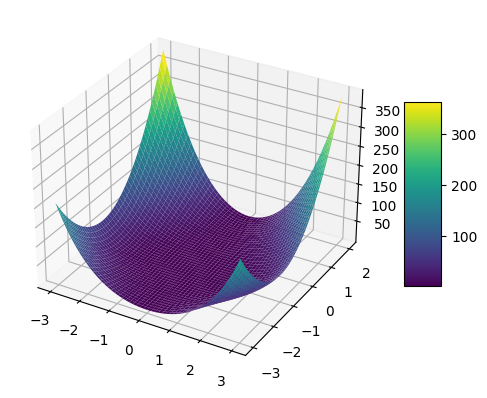

In [11]:
plot3d(h2, A, B, True)
plt.show()

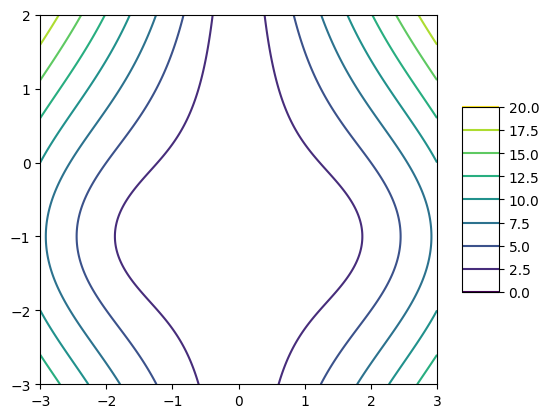

In [12]:
plot3d(h, A, B, False)
plt.show()

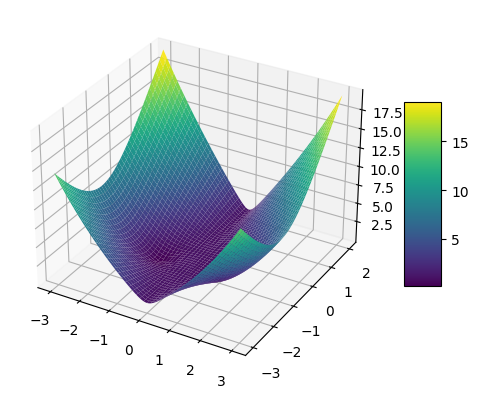

In [13]:
plot3d(h, A, B, True)
plt.show()

Gradient of squared magnitude

$$
\begin{bmatrix}
\frac{\partial h^2}{\partial x}\\
\frac{\partial h^2}{\partial \lambda}
\end{bmatrix}=
\begin{bmatrix}
4x(x^2+2\lambda^2+4\lambda+1)\\
8x^2(\lambda+1)
\end{bmatrix}
$$

In [14]:
def grad_h2(x,l):
    grad_x = 4*x*(x**2+2*l**2+4*l+1)
    grad_l = 8*x**2*(l+1)
    return np.array([grad_x, grad_l])

In [15]:
grad_h2(0,0)

array([0, 0])

We should not start at the saddle points $(0,\lambda_0)$

0.9999999999999931, -0.9999999999999931


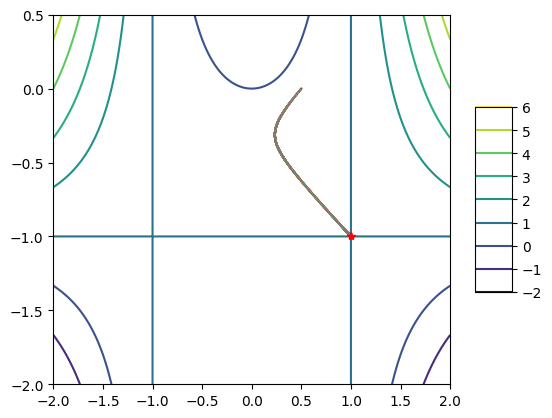

In [16]:
ff = lambda x,l : grad_h2(x,l)

K = 10000
learning_eps = 0.001
xs, ls = grad_desc(K, 0.5, 0, learning_eps, h2, ff, True)
print(f'{xs[-1]}, {ls[-1]}')
plt.plot([xs[-1]], [ls[-1]], marker='*', c='r')
plt.show()

-0.9999999999999931, -0.9999999999999931


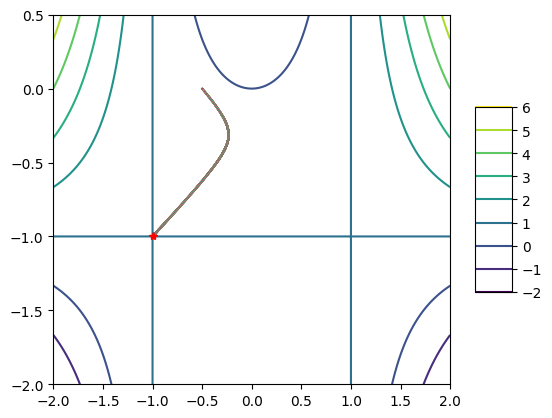

In [17]:
xs, ls = grad_desc(K, -0.5, 0, learning_eps, h2, ff, True)
print(f'{xs[-1]}, {ls[-1]}')
plt.plot([xs[-1]], [ls[-1]], marker='*', c='r')
plt.show()

Gradient of magnitude

$$
\begin{bmatrix}
\frac{\partial h}{\partial x}\\
\frac{\partial h}{\partial \lambda}
\end{bmatrix}=\frac{1}{\sqrt{x^4+x^2(4\lambda^2 +8\lambda+2)+1}}
\begin{bmatrix}
2x(x^2+2\lambda^2+4\lambda+1)\\
4x^2(\lambda+1)
\end{bmatrix}
$$

In [19]:
import math

def grad_h(x,l):
    grad_x = 2*x*(x**2+2*l**2+4*l+1)
    grad_l = 4*x**2*(l+1)
    factor = 1/math.sqrt(x**4+x**2*(4*l**2+8*l+2)+1)
    return np.array([grad_x * factor, grad_l * factor])

In [20]:
grad_h(0,0)

array([0., 0.])

Mind that $(0,\lambda_0)$ are saddle points in $h$ as well. We should not start at any of them.

0.999186474261779, -0.9994251028655677


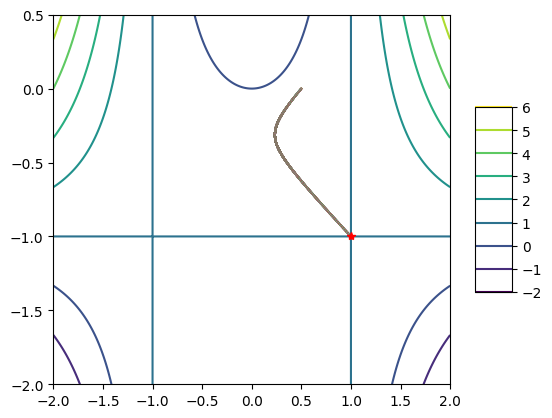

In [21]:
ff = lambda x,l: grad_h(x,l)
xs, ls = grad_desc(K, 0.5, 0, learning_eps, h, ff, True)
print(f'{xs[-1]}, {ls[-1]}')
plt.plot([xs[-1]], [ls[-1]], marker='*', c='r')
plt.show()

-0.999186474261779, -0.9994251028655677


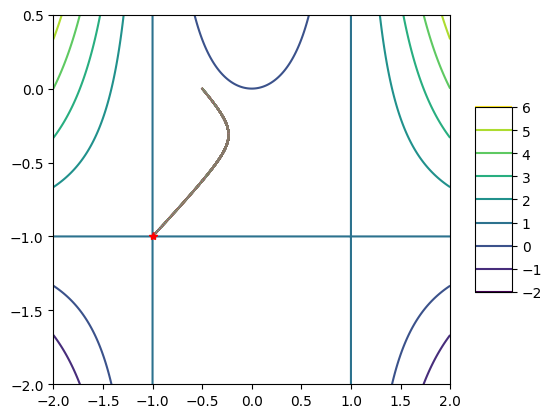

In [22]:
xs, ls = grad_desc(K, -0.5, 0, learning_eps, h, ff, True)
print(f'{xs[-1]}, {ls[-1]}')
plt.plot([xs[-1]], [ls[-1]], marker='*', c='r')
plt.show()

In [23]:
grad_factor = lambda x,l: 1/math.sqrt(x**4+x**2*(4*l**2+8*l+2)+1)
grad_factor(1,-1)

ZeroDivisionError: float division by zero

*In my case, I got an ZeroDevisionError. This is based on the interpretation of the denominator of the grad_factor:*

In [24]:
grad_factor_denom = lambda x,l: math.sqrt(x**4+x**2*(4*l**2+8*l+2)+1)
grad_factor_denom(1,-1)

0.0

Although the minima are more pronounced in $h$ than in $h^2$, gradient descent converges better in $h^2$. This is due to problems of calculating the factor $$\frac{1}{\sqrt{x^4+x^2(4\lambda^2 +8\lambda+2)+1}}$$ of the gradient of $h$ near the solutions. This factor is actually not defined at the solution (division by zero).